1. Procesamiento del Lenguaje Natural

In [ ]:
#LIBRERIAS

import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing import text          ESTA LIBRERIA FUNCIONA HASTA LA RED CONVOLUCIONAL Y HABRIA DE DESCOMENTARLA. PARA EL TRANSFORMER TENGO QUE COMENTAR ESTA Y 
#DESCOMENTAR LA SEÑALADA EN LA CELDA EN LA CELDA DE LIBRERIAS MAS ABAJO. NO ENCONTRÉ EL FALLO.
from sklearn import preprocessing
from keras.utils import pad_sequences
from tensorflow.keras.layers import Dense, Conv1D, GRU
import tensorflow_hub as hub

1. A partir del dataset FinancialPhraseBank utilizando unicamente las frases financieras
con un 100% de coincidencia en la etiqueta realizar las siguientes tareas:
· Bag of words
· TF-IDF
· Word-to-vect


In [ ]:
#Leer csv y cambio nombre columnas
data = pd.read_csv('Sentences_AllAgree.csv', 
                   names = ['phrase', 'label', 'new_phrase', 'new_label'])
data.isnull().sum() # Buscamos si hay NAN

nan_rows = data[data.isnull().any(1)]
nan_rows
new_data = data.dropna()
new_data.index = range(new_data.shape[0])
new_data

,phrase,label,new_phrase,new_label
0,"According to Gran , the company has no plans t...",neutral,accord gran company ha plan move production r...,1
1,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta net sale double ...,2
2,"In the third quarter of 2010 , net sales incre...",positive,third quarter 2010 net sale increase 52 eur ...,2
3,Operating profit rose to EUR 13.1 mn from EUR ...,positive,operate profit rise eur 131 mn eur 87 mn corre...,2
4,"Operating profit totalled EUR 21.1 mn , up fro...",positive,operate profit total eur 211 mn eur 186 mn 20...,2
...,...,...,...,...
2257,Operating result for the 12-month period decre...,negative,operate result 12month period decrease profit ...,0
2258,HELSINKI Thomson Financial - Shares in Cargote...,negative,helsinki thomson financial share cargotec fel...,0
2259,LONDON MarketWatch -- Share prices ended lower...,negative,london marketwatch share price end lower lond...,0
2260,Operating profit fell to EUR 35.4 mn from EUR ...,negative,operate profit fell eur 354 mn eur 688 mn 2007...,0


BAG OF WORD

In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True, # convierto a minuscula
                     ngram_range= (1,1), # palabra por palabra
                     tokenizer = token.tokenize)
text_counts = cv.fit_transform(new_data['new_phrase']) # entreno
dense_matrix = pd.DataFrame(text_counts.todense()) # transformo a df
dense_matrix.head()

# En el primer momento pensé en hacer un for por todas las palabras de cada fila y ver cuantas veces se repite. 
# Finalmente cogí la opción mas facil y rápida utilizando RegexpTokenizer y Countvectorizer. Trás convertirlo a minuscula y hacer el proceso de contar las veces que se repite cada palabra,
# entreno el modelo y lo transfomo en un DataFrame

,0,1,2,3,4,5,6,7,8,9,...,5695,5696,5697,5698,5699,5700,5701,5702,5703,5704
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dense_matrix.sum()

0        8
1        3
2       20
3        1
4        1
        ..
5700     1
5701     1
5702     1
5703     1
5704     1
Length: 5705, dtype: int64

TF-IDF

In [ ]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(new_data['new_phrase'])
dense_matrix2 = pd.DataFrame(text_tf.todense()).round(5)
dense_matrix2.head()

# Entreno el modelo con la columna nueva de frases y la convierto en Densa con 5 decimales para ver si gay diferentes a 0

,0,1,2,3,4,5,6,7,8,9,...,5669,5670,5671,5672,5673,5674,5675,5676,5677,5678
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.32007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dense_matrix2.sum()

0       1.00731
1       5.08194
2       0.34850
3       0.38797
4       0.56333
         ...   
5674    0.21449
5675    2.27294
5676    0.99250
5677    0.49766
5678    0.33130
Length: 5679, dtype: float64

Word-to-Vect

In [ ]:
data_new_phrase = new_data['new_phrase']
data_new_phrase

#Selecciono la columna que necesito

0       accord gran  company ha plan move production r...
1       last quarter 2010  componenta net sale double ...
2       third quarter 2010  net sale increase 52  eur ...
3       operate profit rise eur 131 mn eur 87 mn corre...
4       operate profit total eur 211 mn  eur 186 mn 20...
                              ...                        
2257    operate result 12month period decrease profit ...
2258    helsinki thomson financial  share cargotec fel...
2259    london marketwatch  share price end lower lond...
2260    operate profit fell eur 354 mn eur 688 mn 2007...
2261    sale finland decrease 105  january  sale outsi...
Name: new_phrase, Length: 2262, dtype: object

In [ ]:
list_data_new_phrase = data_new_phrase.to_numpy().tolist()
# Transformo la columna anterior en una lista y lo meto en una variable

In [ ]:
list_token = []
for i in np.arange(len(list_data_new_phrase)):
  phrase = token.tokenize(list_data_new_phrase[i])
  list_token.append(phrase)

  # Hago un for a la variable anteriormente definida y que la tokenize palabra por palabra y lo agrego a una lista. Obteniendo una lista de listas.

In [ ]:
type(list_token)

list

In [ ]:
model = Word2Vec(sentences = list_token,
                 batch_words=15)
model

# Aplico el word2vec a la lista de listas que he metido en la varibale list_toke.

In [ ]:
X=model[model.wv.vocab]
df=pd.DataFrame(X, index=model.wv.vocab)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
accord,0.054131,0.144866,-0.042151,-0.094070,-0.278253,-0.029878,0.106025,-0.251583,0.069588,-0.031832,...,0.327839,0.064705,0.048471,0.061560,-0.199367,0.290576,-0.095604,0.392089,-0.137236,0.251410
company,0.131216,0.378040,-0.099386,-0.234960,-0.708164,-0.069964,0.262776,-0.643718,0.190382,-0.096455,...,0.857023,0.166895,0.123595,0.158887,-0.505630,0.756447,-0.246921,1.011545,-0.345945,0.639058
ha,0.117255,0.329789,-0.088003,-0.208013,-0.623343,-0.067470,0.229130,-0.575575,0.167898,-0.081749,...,0.760263,0.147539,0.105412,0.137753,-0.454218,0.671103,-0.214550,0.896852,-0.298330,0.566395
plan,0.048741,0.128585,-0.034159,-0.079583,-0.254172,-0.027394,0.089148,-0.224847,0.063533,-0.032146,...,0.297119,0.061896,0.040369,0.059968,-0.180424,0.261398,-0.083551,0.357025,-0.122432,0.230536
move,0.021666,0.064521,-0.017181,-0.045787,-0.122815,-0.017496,0.044130,-0.119058,0.035872,-0.019832,...,0.145960,0.034154,0.019226,0.033405,-0.094183,0.129522,-0.047543,0.175237,-0.063794,0.118300


2. Visualizar los resultados obtenidos en el ejercicio 1 mediante alguna técnica de reducción dimensional si fuera necesario.

Bag of words

In [ ]:
tsne = PCA(n_components=100, svd_solver='full')
np.set_printoptions(suppress=True)
weights = tsne.fit_transform(dense_matrix)

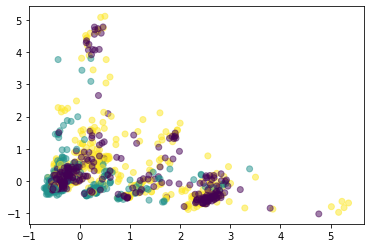

In [ ]:
tsne.explained_variance_

plt.scatter(weights[:,0], weights[:,1], c = new_data.new_label, alpha=0.5)


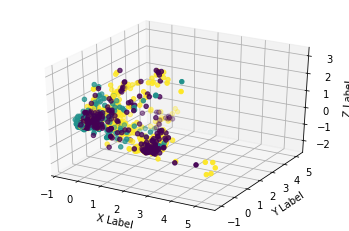

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=new_data.new_label)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

TF-IDF

In [ ]:
tsne2 = PCA(n_components=100, svd_solver='full')
np.set_printoptions(suppress=True)
weights = tsne.fit_transform(dense_matrix2)

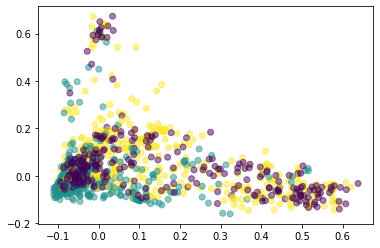

In [ ]:


plt.scatter(weights[:,0], weights[:,1], c = new_data.new_label, alpha=0.5)

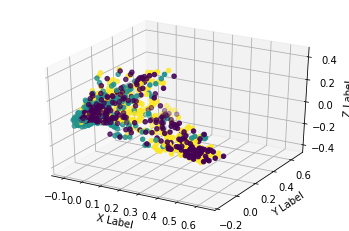

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=new_data.new_label)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

word to vect

In [ ]:
PCA = PCA(n_components=2, svd_solver='full')
weights = PCA.fit_transform(df)
labels = df.index

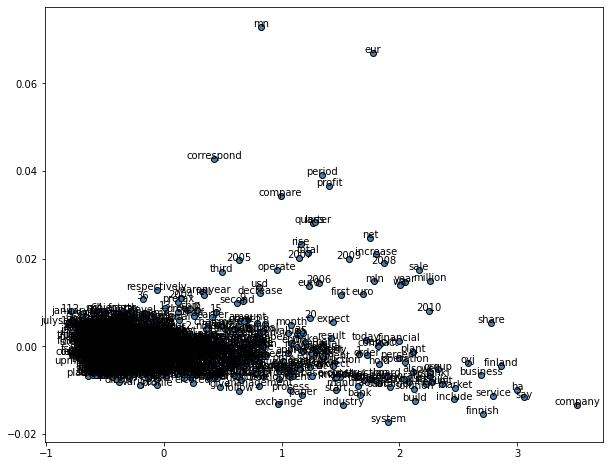

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(weights[:, 0], weights[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, weights[:, 0], weights[:, 1]):
    plt.annotate(label, xy=(x, y), ha= 'center')
plt.show()

3 Mediante el dataset Financial PhraseBank (para
las frases 100% agree con el dataset de clase) construir un clasificador de sentimientos con las 
siguientes técnicas. Comparar sobre test los resultados de vuestro modelo con algún modelo de 
análisis de sentimiento ya implementado como nltk y etc:

Se evaluarán los resultados en función de la distancia al benchmark 0.98 acc(allagree), la 
complejidad de la solución (embeddings utilizados y entrenados, etc) y la
explicación del proceso.

• Redes recurrentes

• Redes convolucionales

• transformers

In [ ]:
def tokenize_documents(corpus):
    tokenizer = text.Tokenizer()
    tokenizer.fit_on_texts(corpus)
    word2id = tokenizer.word_index
    id2word = {v: k for k, v in word2id.items()}
    int_corpus = [
        [word2id[w] for w in text.text_to_word_sequence(doc)] for doc in corpus
    ]
    word_corpus = [
        [w for w in text.text_to_word_sequence(doc)] for doc in corpus
    ]

    return int_corpus, word_corpus, word2id, id2word

In [ ]:
corpus = new_data["new_phrase"].values # Seleccionamos la columna que nos interesa y vemos que todo está todo en minuscula
corpus = tokenize_documents(corpus) # tokenizamos el corpus con la función de arriba dada en clase

labels = new_data["new_label"] # Utilizo la columna 'new_labels' como labels

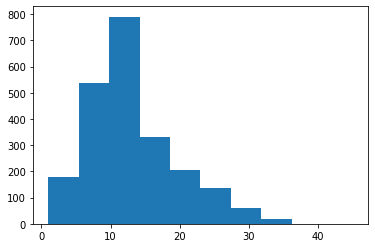

In [ ]:
# Vemos la longitud de los corpus y nos da que vamos a tener descripciones desde 2 tokens hasta 36 tokens
#y la mayoria de las descripciones estan entre 5 y 15 tokens
plt.hist([len(i) for i in corpus[0]])
plt.show()

In [ ]:
maxlen = 36
textos = pad_sequences(corpus[0], maxlen=maxlen, dtype='int32',
                                padding='pre',
                                truncating='pre',
                                value=0.0)

# Ponemos padding y truncating como 'pre' para que los 0 me aparezcan al principio para tratar de poner la informacion lo mas cerca posible de la zona donde 
#vamos a realizar la predicción final para no introducir ruido sobre los calculos donde hay información

In [ ]:
textos

array([[   0,    0,    0, ..., 1664,    3,  104],
       [   0,    0,    0, ...,  133,   30, 1665],
       [   0,    0,    0, ...,    1, 1066,    2],
       ...,
       [   0,    0,    0, ..., 2104, 1328,  410],
       [   0,    0,    0, ...,    1, 2342,    2],
       [   0,    0,    0, ...,   27,  247,  235]], dtype=int32)

In [ ]:
labels.unique()

array([1, 2, 0])

In [ ]:
#Partición de los datos
only_new_labels = new_data.new_label.to_numpy() 
x_train, x_test, y_train, y_test = train_test_split(textos, only_new_labels, test_size= 0.2)

In [ ]:
type(only_new_labels)


numpy.ndarray

In [ ]:
textos.shape

(2262, 36)

In [ ]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1809
453
1809
453


In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, Flatten

In [ ]:
input_dim = len(textos)
input_dim

2262

REDES RECURRENTES

In [ ]:
model = Sequential()

model.add(Embedding(input_dim = len(corpus[2])+1,
                    output_dim = 128,
                    input_length = maxlen))
#model.add(SimpleRNN(64)) 
model.add(LSTM(64))
#model.add(Bidirectional(SimpleRNN(64)))
model.add(Dropout(0.5))
model.add(Dense(3, 
                activation='softmax'))

model.compile('adam',
              'sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          validation_split=0.2)

model.evaluate(x_test, y_test)

Epoch 1/30
12/12 [==============================] - 5s 208ms/step - loss: 1.0142 - accuracy: 0.5764 - val_loss: 0.8508 - val_accuracy: 0.6271
Epoch 2/30
12/12 [==============================] - 1s 93ms/step - loss: 0.8548 - accuracy: 0.6213 - val_loss: 0.7720 - val_accuracy: 0.6575
Epoch 3/30
12/12 [==============================] - 1s 97ms/step - loss: 0.7166 - accuracy: 0.6849 - val_loss: 0.6465 - val_accuracy: 0.7486
Epoch 4/30
12/12 [==============================] - 1s 104ms/step - loss: 0.5620 - accuracy: 0.7713 - val_loss: 0.5800 - val_accuracy: 0.7597
Epoch 5/30
12/12 [==============================] - 1s 92ms/step - loss: 0.4635 - accuracy: 0.8017 - val_loss: 0.5200 - val_accuracy: 0.7762
Epoch 6/30
12/12 [==============================] - 1s 93ms/step - loss: 0.3798 - accuracy: 0.8293 - val_loss: 0.5028 - val_accuracy: 0.7818
Epoch 7/30
12/12 [==============================] - 1s 95ms/step - loss: 0.3145 - accuracy: 0.8514 - val_loss: 0.5211 - val_accuracy: 0.7818
Epoch 8/30


[0.8035189509391785, 0.8498896360397339]

Comenzamos a probar el modelo con una red simple la cual daba un accuracy del 0.72.

Utilizamos activation softmax para convertir los datos procesados en probabilidades. 

Tambien utilizamos una capa dropout para reducir el overfitting.

Continuamos compilando con el método de descenso de gradiente 'ADAM' y usamos  'sparse_categorical_crossentropy' para calcular la perdida de entropia
Despues probé con una red LSTM y el accuracy subió al 0.85 y bajo el val_acc de 1.2 a 0.80.

Seguimos probando con una bidireccional pero nos reduce el accuracy al 0.72, asi que volvemos a la prueba anterior.

Seguí probando con varios cambios y este modelo es el que me dió mejor resultado. Al ejecutarlo de nuevo el val_acc subió al 1.031



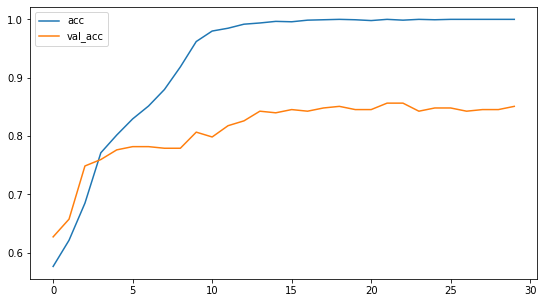

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'],label="acc")
plt.plot(hist.history['val_accuracy'],label="val_acc")
plt.legend()

 REDES CONVOLUCIONALES

In [ ]:
from tensorflow.keras.layers import Dense, Conv1D, GRU, MaxPooling1D
from tensorflow.keras import optimizers
from keras.layers import GlobalMaxPooling1D


In [ ]:
model2 = Sequential ()

model2.add(Embedding(input_dim = len(corpus[2])+1,
                    output_dim = 128,
                    input_length = maxlen))

model2.add(Conv1D(128, 
                  kernel_size = 5, 
                  activation="relu"))

model2.add(Dense(128, 
                 activation="relu"))

model2.add(MaxPooling1D())

model2.add(Flatten())

model2.add(Dropout(0.5))

model2.add(Dense(units=60, 
                 activation = 'softmax'))


model2.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist2 = model2.fit(x_train, y_train,
          batch_size=128,
          epochs=30,
          validation_split=0.2)

model2.evaluate(x_test, y_test)

#Comenzamos el modelo metiendo el Embedding. 
# Utilizo una capa Conv1D de 128.
# A continuación añado una capa Dense con activacion 'relu', seguida de una capa Maxpooling que educe la muestra de la representación de entrada tomando el valor máximo de una ventana.
# Seguimos de una capa Flatten para unidimensionalizar la entrada multidimensional.
# Para reducir el overfitting utilizamos una capa Dropout de 0.5
# Finalmente añadimos una capa Dense con activacion 'softmax' y compilamos 


Epoch 1/30
12/12 [==============================] - 3s 205ms/step - loss: 3.1140 - accuracy: 0.5314 - val_loss: 1.0537 - val_accuracy: 0.6271
Epoch 2/30
12/12 [==============================] - 1s 90ms/step - loss: 1.0044 - accuracy: 0.5847 - val_loss: 0.8720 - val_accuracy: 0.6326
Epoch 3/30
12/12 [==============================] - 1s 86ms/step - loss: 0.9144 - accuracy: 0.6040 - val_loss: 0.7980 - val_accuracy: 0.6823
Epoch 4/30
12/12 [==============================] - 1s 100ms/step - loss: 0.7761 - accuracy: 0.6849 - val_loss: 0.7051 - val_accuracy: 0.7486
Epoch 5/30
12/12 [==============================] - 1s 100ms/step - loss: 0.6042 - accuracy: 0.7560 - val_loss: 0.5800 - val_accuracy: 0.7652
Epoch 6/30
12/12 [==============================] - 1s 93ms/step - loss: 0.4477 - accuracy: 0.8086 - val_loss: 0.5320 - val_accuracy: 0.7762
Epoch 7/30
12/12 [==============================] - 1s 95ms/step - loss: 0.3493 - accuracy: 0.8376 - val_loss: 0.5125 - val_accuracy: 0.7818
Epoch 8/30

[0.5319944024085999, 0.8432670831680298]

Comenzamos el modelo metiendo el Embedding.

Utilizo una capa Conv1D de 128.

A continuación añado una capa Dense con activacion 'relu', seguida de una capa Maxpooling que educe la muestra de la representación de entrada tomando el valor máximo de una ventana.

Seguimos de una capa Flatten para unidimensionalizar la entrada multidimensional.

Para reducir el overfitting utilizamos una capa Dropout de 0.5.
Finalmente añadimos una capa Dense con activacion 'softmax' y compilamos.

En hist2 probamos con 30 épocas y el accuracy es de 0.80.
Probamos con 50 epocas y nos baja a 0.75, asi que dejamos las 30 épocas.
Seguimos probando y en la ultima capa Dense aumentamos a 60 units y subimos el accuracy a 0.84.

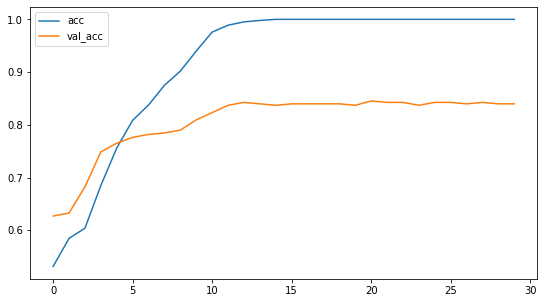

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.plot(hist2.history['accuracy'],label="acc")
plt.plot(hist2.history['val_accuracy'],label="val_acc")
plt.legend()


TRANSFORMERS

In [ ]:
!pip install -q tensorflow-text
!pip install -q tf-models-official
!pip install -q -U keras-tuner

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text #LIBRERIA SEÑALADA EN LA PRIMERA CELDA
from official.nlp import optimization
from sklearn.utils import shuffle

In [ ]:
from sklearn.utils import shuffle

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-12_H-768_A-12'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/1',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/1',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

In [ ]:
encoder = hub.KerasLayer(
        tfhub_handle_encoder,
        trainable=True,
        name='BERT_encoder'
)

In [ ]:
def build_classifier_model(encoder, processer, epochs_set, initial_learning_rate):
    # Definición de la entrada del modelo
    text_input = tf.keras.layers.Input(
        shape=(),
        dtype=tf.string,
        name='text'
    )
    # Definición del preprocesador para bert
    preprocessing_layer = hub.KerasLayer(
        processer,
        name='preprocessing'
    )
    encoder_inputs = preprocessing_layer(text_input)

    # Definición del Modelo Bert para codificar la información.
    encoder = hub.KerasLayer(
        encoder,
        trainable=True,
        name='BERT_encoder'
    )
    outputs = encoder(encoder_inputs)
   
    # Seleccionamos la representación del documento entero.
    net = outputs['pooled_output']
   
    # Definimos la arquitectura del modelo de salida ajustada a la tarea
    net = tf.keras.layers.Dropout(0.5)(net)
    net = tf.keras.layers.Dense(units = 512, activation='selu')(net)
    net = tf.keras.layers.Dense(units = 256, activation='selu')(net)
    net = tf.keras.layers.Dense(units = 128, activation='selu')(net)
    net = tf.keras.layers.Dense(units = 64, activation='selu')(net)
    net = tf.keras.layers.Dense(units = 32, activation='selu')(net)
    net = tf.keras.layers.Dense(8, activation='selu')(net)
    net = tf.keras.layers.Dense(3, activation='softmax', name='classifier')(net)
    
    classifier_model = tf.keras.Model(text_input, net)
    
    # Definición del optimizador para el problema
    epochs = epochs_set
    steps_per_epoch = new_data.shape[0] 
    num_train_steps = steps_per_epoch * epochs
    num_warmup_steps = int(0.1*num_train_steps)
   
    optimizer = optimization.create_optimizer(
        init_lr=initial_learning_rate,
        num_train_steps=num_train_steps,
        num_warmup_steps=num_warmup_steps,
        optimizer_type='adamw'
      )
    # Compilación del modelo
    classifier_model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
      )

    
    return classifier_model

In [ ]:
#Construimosel modelo con la función anterior
epocas = 100

model3 = build_classifier_model(
    tfhub_handle_encoder,
    tfhub_handle_preprocess,
    epocas,
    5e-5
)
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
history = model3.fit(x=new_data.phrase[:1800],
                    y=new_data.new_label[:1800],
                    validation_split=0.1,
                    batch_size=32,
                    epochs=8
                    )

Epoch 1/8
51/51 [==============================] - 48s 938ms/step - loss: 0.3651 - accuracy: 0.8778 - val_loss: 0.5422 - val_accuracy: 0.8056
Epoch 2/8
51/51 [==============================] - 47s 927ms/step - loss: 0.3307 - accuracy: 0.8969 - val_loss: 0.5773 - val_accuracy: 0.8111
Epoch 3/8
51/51 [==============================] - 47s 931ms/step - loss: 0.2862 - accuracy: 0.9093 - val_loss: 0.5252 - val_accuracy: 0.8222
Epoch 4/8
51/51 [==============================] - 47s 930ms/step - loss: 0.2452 - accuracy: 0.9296 - val_loss: 0.3736 - val_accuracy: 0.8611
Epoch 5/8
51/51 [==============================] - 47s 930ms/step - loss: 0.1928 - accuracy: 0.9463 - val_loss: 0.2642 - val_accuracy: 0.9278
Epoch 6/8
51/51 [==============================] - 48s 933ms/step - loss: 0.1552 - accuracy: 0.9580 - val_loss: 0.2528 - val_accuracy: 0.9222
Epoch 7/8
51/51 [==============================] - 48s 932ms/step - loss: 0.1350 - accuracy: 0.9685 - val_loss: 0.3669 - val_accuracy: 0.8833
Epoch 

Cuando construimos metemos los datos pero no con la columna new_phrase sino con la que no se ha modificado(phrase).
Creamos una funciñon que da entrada al modeloy del preprocesado.
Seguidamente definimos el Modelo Bert y realizamos la arquitectura.
por ultimo definimos el optimizados y compilamos el modelo como en los ejercicios anteriores cambiando el optimizer.
Una vez terminada la función contruimos el modelo con tfhub_handle_encoder y tfhub_handle_preprocess y lo entrenamos con el fit.
Al ir muy lento, activé la GPU y obtuve unos resutados peores con 10 epocas que con 8.
La ultima ejecución es de 0.93. Superior a los anteriores modelo de redes recurrentes y convolucionales




2. Systemas de Recomendación

Completar el modelo NeuMF sobre el dataset movilens visto en clase y analizar los resultados 
del modelo. Aplicar si es necesario algun tipo de preprocesado sobre los datos de entrada para 
obtener una mejor performance.

In [ ]:
# DESCARGA DE DATOS
from urllib.request import urlretrieve
import zipfile

urlretrieve("http://files.grouplens.org/datasets/movielens/ml-100k.zip", "movielens.zip")
zip_ref = zipfile.ZipFile('movielens.zip', "r")
zip_ref.extractall()
print(zip_ref.read('ml-100k/u.info'))

# Carga de los datasets (users, movies, and ratings).
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(
    'ml-100k/u.user', sep='|', names=users_cols, encoding='latin-1')

ratings_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(
    'ml-100k/u.data', sep='\t', names=ratings_cols, encoding='latin-1')
genre_cols = [
    "genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy",
    "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
    "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"
]
movies_cols = [
    'movie_id', 'title', 'release_date', "video_release_date", "imdb_url"
] + genre_cols
movies = pd.read_csv(
    'ml-100k/u.item', sep='|', names=movies_cols, encoding='latin-1')

# Como los ids empiezan en 1 los cambiamos a 0
users["user_id"] = users["user_id"].apply(lambda x: str(x-1))
movies["movie_id"] = movies["movie_id"].apply(lambda x: str(x-1))
movies["year"] = movies['release_date'].apply(lambda x: str(x).split('-')[-1])
ratings["movie_id"] = ratings["movie_id"].apply(lambda x: str(x-1))
ratings["user_id"] = ratings["user_id"].apply(lambda x: str(x-1))
ratings["rating"] = ratings["rating"].apply(lambda x: float(x))

genre_occurences = movies[genre_cols].sum().to_dict()

# Peliculas en mas de un genero se ajusta.
def mark_genres(movies, genres):
  def get_random_genre(gs):
    active = [genre for genre, g in zip(genres, gs) if g==1]
    if len(active) == 0:
      return 'Other'
    return np.random.choice(active)
  def get_all_genres(gs):
    active = [genre for genre, g in zip(genres, gs) if g==1]
    if len(active) == 0:
      return 'Other'
    return '-'.join(active)
  movies['genre'] = [
      get_random_genre(gs) for gs in zip(*[movies[genre] for genre in genres])]
  movies['all_genres'] = [
      get_all_genres(gs) for gs in zip(*[movies[genre] for genre in genres])]

mark_genres(movies, genre_cols)


movielens = ratings.merge(movies, on='movie_id').merge(users, on='user_id')

def split_dataframe(df, holdout_fraction=0.1):

  test = df.sample(frac=holdout_fraction, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test


  

b'943 users\n1682 items\n100000 ratings\n'


In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd
import collections
from mpl_toolkits.mplot3d import Axes3D
from IPython import display
from matplotlib import pyplot as plt
import sklearn
import sklearn.manifold
from tensorflow.keras.layers import Input, Embedding, Dense, Flatten, concatenate,multiply
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.3f}'.format
def mask(df, key, function):
  """Returns a filtered dataframe, by applying function to key"""
  return df[function(df[key])]

def flatten_cols(df):
  df.columns = [' '.join(col).strip() for col in df.columns.values]
  return df

pd.DataFrame.mask = mask
pd.DataFrame.flatten_cols = flatten_cols

USER_RATINGS = False

In [ ]:

users_ratings = (
    ratings
    .groupby('user_id', as_index=False)
    .agg({'rating': ['count', 'mean']})
    .flatten_cols()
    .merge(users, on='user_id')
)
users.head()

,user_id,age,sex,occupation,zip_code
0,0,24,M,technician,85711
1,1,53,F,other,94043
2,2,23,M,writer,32067
3,3,24,M,technician,43537
4,4,33,F,other,15213


In [ ]:
users_df = pd.get_dummies(users.drop("user_id",axis=1)).dropna(axis=1)
users_df["user_id"] =users["user_id"].values 
movies_df = pd.get_dummies(movies.drop("movie_id",axis=1)).dropna(axis=1)
movies_df["movie_id"] =movies["movie_id"].values 

In [ ]:
users_1d = ratings.user_id.astype(float)
movies_1d = ratings.movie_id.astype(float)
ratings_ = ratings.rating

idx = np.random.choice(
    range(users_1d.shape[0]),
    size=80000,
    replace=False
)

X1=users_1d.loc[idx]
X2=movies_1d.loc[idx]
y=ratings_.loc[idx]
X1_t=users_1d.loc[~np.isin(users_1d.index,idx)]
X2_t=movies_1d.loc[~np.isin(movies_1d.index,idx)]
y_t=ratings_.loc[~np.isin(ratings_.index,idx)]

In [ ]:
R_df = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
R_df.head()

movie_id,0,1,10,100,1000,1001,1002,1003,1004,1005,...,990,991,992,993,994,995,996,997,998,999
user_id,,,,,,,,,,,,,,,,,,,,,
0,5.000,3.000,2.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
100,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
101,3.000,2.000,3.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
num_users = len(users.user_id.unique())
num_items = len(movies.movie_id.unique())

In [ ]:
def neural_collaborative_filtering_1d(num_users, num_items, layers = [20,10], reg_layers=[0,0]):
    num_layer = len(layers)
    
    user_input = Input(shape=(1,),  name = 'user_input')
    item_input = Input(shape=(1,), name = 'item_input')

    MLP_Embedding_User = Embedding(num_users,  2, name = 'user_embedding',
                              )
    MLP_Embedding_Item = Embedding(num_items, 2, name = 'item_embedding',
                                    )   
    
    user_latent = Flatten()(MLP_Embedding_User(user_input))
    item_latent = Flatten()(MLP_Embedding_Item(item_input))
    
    vect = concatenate([user_latent, item_latent], axis=-1)
    
    for idx in range(1, num_layer):
        layer = Dense(layers[idx], activation='relu', name = 'layer%d' %idx)
        vect = layer(vect)
        
    prediction = Dense(1, activation='linear', name = 'prediction')(vect)
    
    model4 = Model(inputs=[user_input, item_input], 
                  outputs=prediction)
    
    model4.compile(optimizer="adam", loss='mean_squared_error')
    
    return model4

Epoch 1/15
2500/2500 [==============================] - 9s 3ms/step - loss: 1.9434
Epoch 2/15
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8829
Epoch 3/15
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8716
Epoch 4/15
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8658
Epoch 5/15
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8602
Epoch 6/15
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8513
Epoch 7/15
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8415
Epoch 8/15
2500/2500 [==============================] - 9s 3ms/step - loss: 0.8335
Epoch 9/15
2500/2500 [==============================] - 9s 4ms/step - loss: 0.8284
Epoch 10/15
2500/2500 [==============================] - 9s 4ms/step - loss: 0.8244
Epoch 11/15
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8200
Epoch 12/15
2500/2500 [==============================] - 8s 3ms/step - loss: 0.8154
E

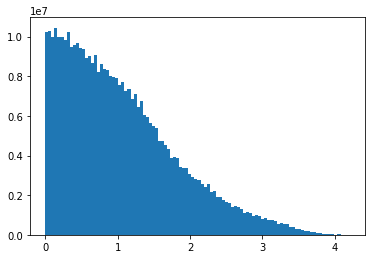

In [ ]:
model4 = neural_collaborative_filtering_1d(num_users, num_items)
model4.fit([X1,X2], y, epochs=15)
pred=model4.predict([X1_t,X2_t])
plt.hist((np.abs(y_t.values-pred).reshape(-1)),bins=100)
plt.show()

In [ ]:
# A parir del la epoca 

In [ ]:
np.mean(np.abs(pred-y_t.values))

1.0447253744961418

In [ ]:
def NeuMF(num_users, num_items, mf_dim=10, layers=[10], reg_layers=[0], reg_mf=0):
    #embeddings  

    num_layer = len(layers) 
    user_input = Input(shape=(1,), dtype='int32', name='user_input')
    item_input = Input(shape=(1,), dtype='int32', name='item_input')
    
    # embedding layer
    mf_user_embedding = Embedding(input_dim=num_users, 
                                output_dim=mf_dim,
                                embeddings_initializer='RandomNormal',
                                input_length=1)
  
    mf_item_embedding = Embedding(input_dim=num_items, 
                                  output_dim=mf_dim,
                                  embeddings_initializer='RandomNormal',
                                  input_length=1)
    
    mlp_user_embedding = Embedding(input_dim=num_users, 
                                  output_dim=1,
                                  embeddings_initializer='RandomNormal', 
                                  input_length=1)
    
    mlp_user_embedding = Embedding(input_dim=num_users, 
                                  output_dim=1,
                                  embeddings_initializer='RandomNormal',
                                  input_length=1)
    
    # MF parte
    mf_user_latent = Flatten()(mf_user_embedding(user_input))
    mf_item_latent = Flatten()(mf_item_embedding(item_input))
    mf_vector = tf.keras.layers.multiply([mf_user_latent, mf_item_latent])

    # MLP parte
    mlp_user_latent = Flatten()(mlp_user_embedding(user_input))
    mlp_item_latent = Flatten()(mlp_user_embedding(item_input))
    mlp_vector = tf.keras.layers.concatenate([mlp_user_latent, mlp_item_latent])
    for idx in range(1, num_layer):
        layer = Dense(layers[idx], activation='relu')
        mlp_vector = layer(mlp_vector)

    #mf_vector = Lambda(lambda x: x * alpha)(mf_vector)
    #mlp_vector = Lambda(lambda x : x * (1-alpha))(mlp_vector)
    predict_vector = tf.keras.layers.concatenate([mf_vector, mlp_vector])
    
    prediction = Dense(1, activation='linear')(predict_vector)
    
    model5 = Model(inputs=[user_input, item_input], 
                  outputs=prediction)
    model5.compile(optimizer="adam", loss='mean_squared_error')

    return model5

In [ ]:
model5 = NeuMF(num_users, num_items)

625/625 [==============================] - 1s 2ms/step


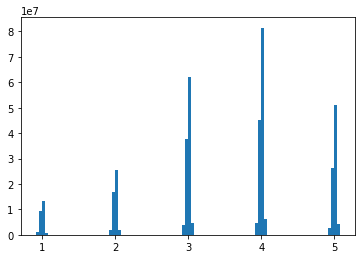

In [ ]:
pred=model5.predict([X1_t,X2_t])
plt.hist((np.abs(y_t.values-pred).reshape(-1)),bins=100)
plt.show()

In [ ]:
np.mean(np.abs(pred-y_t.values))

3.528854831844641

Añadimos 2 capas user y 2 item utilizando un embeddings_initializer='RandomNormal' que extrae muestras aleatorias de una distribucion normal.

Con esto podemos observar que al aplicar NeuFM se mejora la capacidad y eficacia del modelo respecto al anterior.